<a href="https://colab.research.google.com/github/AnzalaHidayat/202055202018-Anzala/blob/master/Deeplearning_klasifikasi_kematangan_strawberry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir /content/strawberry

In [2]:
cp /content/drive/MyDrive/sip/dataset.zip /content/strawberry

In [3]:
!unzip /content/strawberry/dataset.zip -d /content/strawberry

Archive:  /content/strawberry/dataset.zip
   creating: /content/strawberry/dataset/masak/
  inflating: /content/strawberry/dataset/masak/1.jpg  
  inflating: /content/strawberry/dataset/masak/10.jpg  
  inflating: /content/strawberry/dataset/masak/100.jpg  
  inflating: /content/strawberry/dataset/masak/101.jpg  
  inflating: /content/strawberry/dataset/masak/102.jpg  
  inflating: /content/strawberry/dataset/masak/103.jpg  
  inflating: /content/strawberry/dataset/masak/104.jpg  
  inflating: /content/strawberry/dataset/masak/105.jpg  
  inflating: /content/strawberry/dataset/masak/106.jpg  
  inflating: /content/strawberry/dataset/masak/107.jpg  
  inflating: /content/strawberry/dataset/masak/108.jpg  
  inflating: /content/strawberry/dataset/masak/109.jpg  
  inflating: /content/strawberry/dataset/masak/11.jpg  
  inflating: /content/strawberry/dataset/masak/110.jpg  
  inflating: /content/strawberry/dataset/masak/111.jpg  
  inflating: /content/strawberry/dataset/masak/12.jpg  
  i

In [4]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from keras.optimizers import Adam
from pathlib import Path
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from sklearn.model_selection import train_test_split

In [5]:
dataset_path = Path(r'/content/strawberry/dataset')
file_path = list(dataset_path.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], file_path))

In [6]:
file_path = pd.Series(file_path).astype(str)
labels = pd.Series(labels)
df = pd.concat([file_path, labels], axis=1)
df.columns = ['image', 'label']
df.head()

,image,label
0,/content/strawberry/dataset/masih muda/50.jpg,masih muda
1,/content/strawberry/dataset/masih muda/40.jpg,masih muda
2,/content/strawberry/dataset/masih muda/96.jpg,masih muda
3,/content/strawberry/dataset/masih muda/58.jpg,masih muda
4,/content/strawberry/dataset/masih muda/80.jpg,masih muda


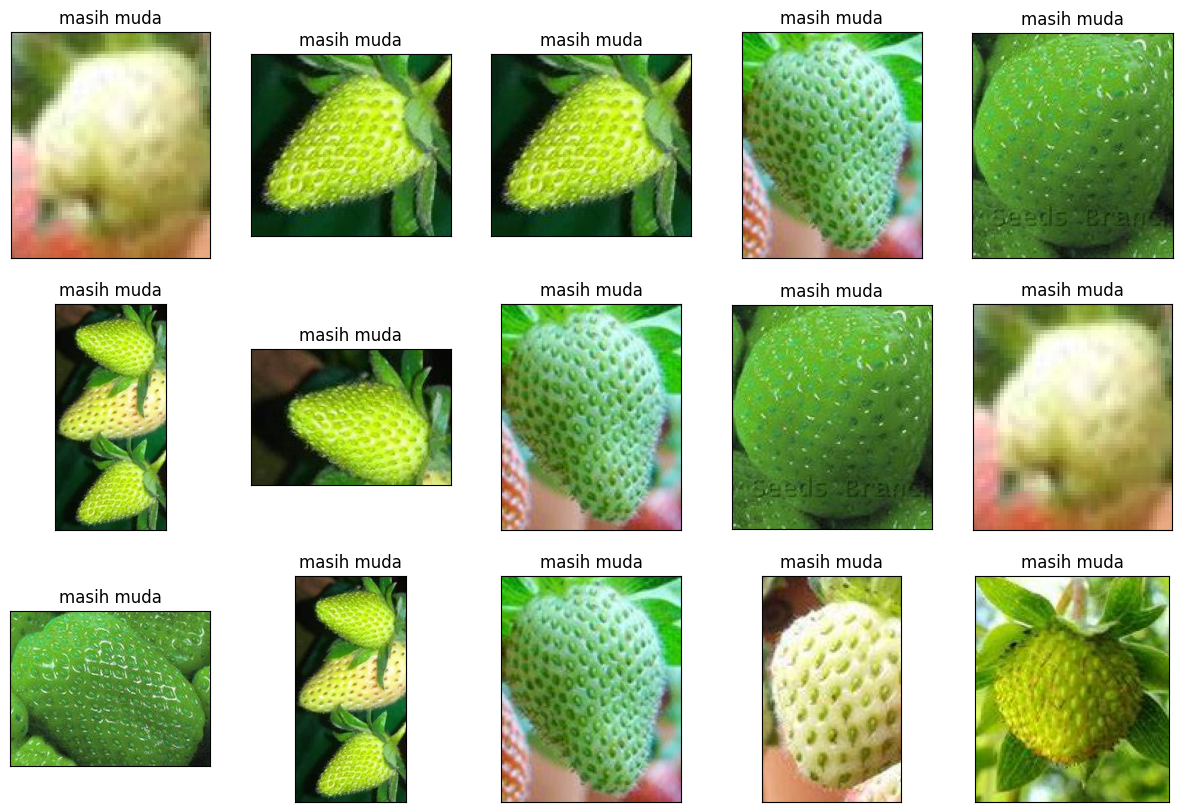

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.image[i]))
    ax.set_title(df.label[i])
    
plt.show()

In [8]:
df.label.value_counts()

masak             111
masih muda        104
setengah masak    102
Name: label, dtype: int64

In [9]:
df = df[df['label'].apply(lambda x: x[-2:] != 'GT')].reset_index(drop=True)
df.label.value_counts()

masak             111
masih muda        104
setengah masak    102
Name: label, dtype: int64

In [10]:
x_train, x_test = train_test_split(df, test_size=0.3,random_state=30)
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=30)

In [11]:
print("Shape of training data", x_train.shape)
print("Shape of test data", x_test.shape)
print("Shape of validation data", x_val.shape)

Shape of training data (176, 2)
Shape of test data (96, 2)
Shape of validation data (45, 2)


In [12]:
image_data_generator = ImageDataGenerator(rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
train = image_data_generator.flow_from_dataframe(dataframe=x_train, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical', shuffle=False)
test = image_data_generator.flow_from_dataframe(dataframe=x_test, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical', shuffle=False)
val = image_data_generator.flow_from_dataframe(dataframe=x_val, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical',shuffle=False)

Found 176 validated image filenames belonging to 3 classes.
Found 96 validated image filenames belonging to 3 classes.
Found 45 validated image filenames belonging to 3 classes.


In [13]:
input_shape = (200, 200, 3)

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=input_shape ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 32)       0

In [15]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)
history = model.fit(train, batch_size= 512, validation_data=val, epochs=100, callbacks=callback)

Epoch 1/100
6/6 [==============================] - 32s 5s/step - loss: 1.0782 - accuracy: 0.4659 - val_loss: 0.8863 - val_accuracy: 0.6000
Epoch 2/100
6/6 [==============================] - 27s 5s/step - loss: 0.7325 - accuracy: 0.6932 - val_loss: 1.0976 - val_accuracy: 0.4889
Epoch 3/100
6/6 [==============================] - 30s 5s/step - loss: 0.6543 - accuracy: 0.6818 - val_loss: 0.4726 - val_accuracy: 0.7111
Epoch 4/100
6/6 [==============================] - 27s 4s/step - loss: 0.5360 - accuracy: 0.7386 - val_loss: 0.4892 - val_accuracy: 0.7111
Epoch 5/100
6/6 [==============================] - 28s 4s/step - loss: 0.5217 - accuracy: 0.7443 - val_loss: 0.4014 - val_accuracy: 0.7333
Epoch 6/100
6/6 [==============================] - 28s 5s/step - loss: 0.4417 - accuracy: 0.7784 - val_loss: 0.4292 - val_accuracy: 0.7333
Epoch 7/100
6/6 [==============================] - 37s 6s/step - loss: 0.3601 - accuracy: 0.8239 - val_loss: 0.2290 - val_accuracy: 0.9333
Epoch 8/100
6/6 [==========

In [16]:
model.save('model-1.h5')

In [17]:
accuracy = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

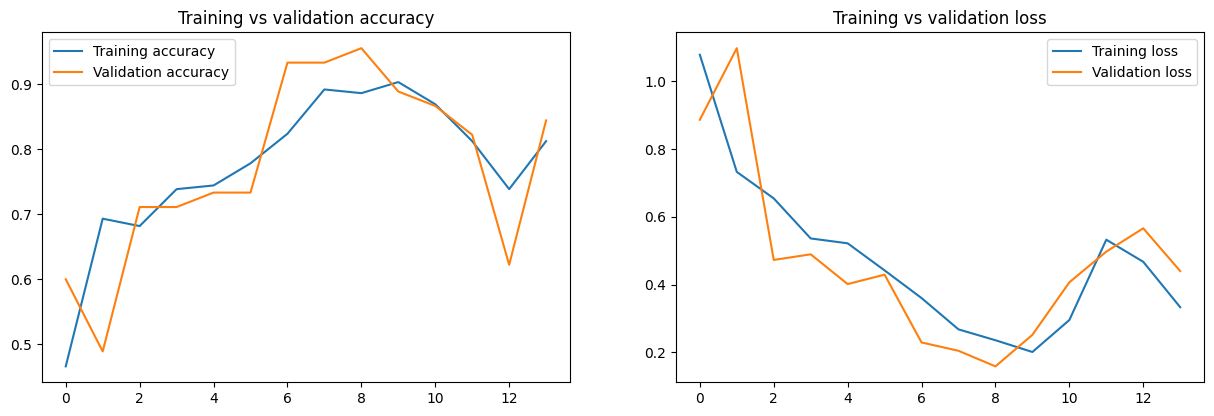

In [18]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")
plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")
plt.show()

In [19]:
pred = model.predict(test)

3/3 [==============================] - 6s 2s/step


In [20]:
pred = np.argmax(pred, axis=1)

In [21]:
labels = train.class_indices

In [22]:
labels

{'masak': 0, 'masih muda': 1, 'setengah masak': 2}

In [23]:
labels = dict((v,k) for k, v in labels.items())

In [24]:
labels

{0: 'masak', 1: 'masih muda', 2: 'setengah masak'}

In [25]:
y_pred = [labels[k] for k in pred]

In [26]:
print(classification_report(x_test.label, y_pred))

                precision    recall  f1-score   support

         masak       0.88      1.00      0.94        29
    masih muda       0.94      0.91      0.92        33
setengah masak       0.90      0.82      0.86        34

      accuracy                           0.91        96
     macro avg       0.91      0.91      0.91        96
  weighted avg       0.91      0.91      0.91        96



In [27]:
print(confusion_matrix(x_test.label, y_pred))

[[29  0  0]
 [ 0 30  3]
 [ 4  2 28]]


In [28]:
test_accuracy = model.evaluate(test)[1]

3/3 [==============================] - 6s 2s/step - loss: 0.4108 - accuracy: 0.9062
